# Project: Classification - Loan Eligibility Prediction

Welcome to the project on classification. We will use the credit risk dataset for this problem.

----------------
## Context: 
----------------

Credit risk is the risk of loss resulting from the failure by a borrower to repay the principal and interest owed to the lender. The lender uses the interest payments from the loan to compensate for the risk of potential losses. When the borrower defaults on his/her obligations, it causes an interruption in the cash flow of the lender.

In the banking sector, this is an important factor to be considered before approving the loan of an applicant in order to cushion the lender from loss of cash flow and reduce the severity of losses. 

------------------
## Objective:
------------------

Easy House is a finance company that deals in several varieties of home loans. They have a presence across urban, semi-urban, and rural areas. Currently, the customer first applies for a home loan post which the company validates the customer's eligibility for that loan. 

Now, the company wants to automate the loan eligibility process. They want to harness their past customers' data to build a model to predict whether the loan should be approved or not. This would help the company prevent potential losses, save time and focus more on eligible customers.

--------------------------
## Data Dictionary:
--------------------------

The data contains the following attributes:

* **Loan_ID**: Unique Loan ID
* **Gender**: Gender of the applicant - Male/Female
* **Married**: Whether the applicant is married or not (Yes/No)
* **Dependents**: Number of dependents of the applicant
* **Education**: Applicant's education (Graduate/Not Graduate)
* **Self_Employed**: Whether the applicant is self-employed (Yes/No)
* **ApplicantIncome**: The income of the applicant (\$)
* **CoapplicantIncome**: The co-applicant's income in case of a joint loan and 0 otherwise (\$)
* **LoanAmount**: Loan amount (dollars in thousands) 
* **Loan_Amount_Term**: Term of loan in months
* **Credit_History**: Whether the applicant's credit history meets required guidelines
* **Property_Area**: The area the property pertaining to the loan belongs to - Urban/Semi-Urban/Rural
* **Loan_Status**: Loan approved (1 - Yes, 0 - No)

## Importing necessary libraries and overview of the dataset - Add libraries as needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, precision_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#for tuning the model
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [ ]:
#@title Reading in the data as a dataframe
# data = pd.read_csv("CreditRisk.csv")
# data.head()

import requests
from io import StringIO  

orig_url="https://drive.google.com/file/d/1iZ9g3E-i6nAkM4Pzcqz27Ntz8z77DPgF/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
loan_df = pd.read_csv(csv_raw)
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [ ]:
#@title Printing the Info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


**Observation:**

- There are 614 observations and 12 columns.
- Not all columns have 614 non-null observations. **There are some missing values in the data**
- Gender has a total of 601 non-null observations (missing 13)
- Married has a total of 611 non-null observations (missing 3)
- Dependends has a total of 599 non-null observations (missing 16)
- Self_Employed has a total of 582 non-null observations (missing 32)
- Loan_Amount_Term has a total of 600 non-null observations (missing 14)
- Credit_History has a total of 564 non-null obserations (missing 50)
- Records with missing/null values will need to be deleted from the dataset
- Types present are objects, integers, and floats








In [ ]:
#@title Checking Unique Values in each column
loan_df.nunique()


Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

**Observations:**

- **Loan_ID is an identifier** which is unique for each customer and we can **drop this column** because it will not add any value to our analysis.
- On the basis of number of unique values in each column and the data description, we can identify the continuous and categorical columns in the data.
- **Categorical Variables:** Gender, Married, Education, Self_Employed, Credit_History, Property_Area, Loan_Status, Dependents
- **Numerical Variables:** ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

**Dropping NA/null values from the dataset**

In [ ]:
#dropping NA/null values from the dataset
loan_df = loan_df.dropna(axis = 0, how = 'any')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            499 non-null    object 
 1   Gender             499 non-null    object 
 2   Married            499 non-null    object 
 3   Dependents         499 non-null    object 
 4   Education          499 non-null    object 
 5   Self_Employed      499 non-null    object 
 6   ApplicantIncome    499 non-null    int64  
 7   CoapplicantIncome  499 non-null    float64
 8   LoanAmount         499 non-null    int64  
 9   Loan_Amount_Term   499 non-null    float64
 10  Credit_History     499 non-null    float64
 11  Property_Area      499 non-null    object 
 12  Loan_Status        499 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 54.6+ KB


**Dropping columns mentioned above**

In [ ]:
loan_df = loan_df.drop(['Loan_ID'], axis = 1)

We decided dependents was actually a categorical variable because it had a 3+ option

In [ ]:
#creating numerical columns
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
#creating categorical columns
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed','Credit_History','Property_Area','Loan_Status','Dependents']

### **Exploratory Data Analysis and Preprocessing**

In [ ]:
#@title Univariate Analysis of Numerical Columns
#Checking summary Statistics
loan_df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,499.0,5336.128257,5618.157076,150.0,2885.5,3859.0,5825.0,81000.0
CoapplicantIncome,499.0,1566.995832,2580.954598,0.0,0.0,1086.0,2251.5,33837.0
LoanAmount,499.0,139.224449,83.684395,0.0,98.0,125.0,166.5,600.0
Loan_Amount_Term,499.0,342.012024,64.860368,36.0,360.0,360.0,360.0,480.0


**Observations**


*   Average ApplicantIncome is 5336.13/mo. There is a huge range from 150/mo to 81000/mo indicating that there are outliers on the low and high end of the spectrum. Standard deviation is also incredibly large suggesting a wide variance of distribution from the mean. The quartile ranges suggest that the majority of applicants have low income.
*  Average CoapplicantIncome is lower at 2580.96/mo. The range is slightly less but still quite large from 0/mo to 33837/mo suggesting again that there are extreme values at either end of the range. Note that applicants will often not have coapplicants, so it is not surprising to see 0/mo in our range for this variable. Standard deviation is also large suggesting a wide variance of distribution from the mean. The quartile ranges suggest that the majority of coapplicants have low income.
*   Average LoanAmount is 139.22. The range is notably large from 0 to 600 suggesting that there are outliers, but the relatively low standard deviation suggests a tighter distribution from the mean.
*   The average Loan_Amount_Term is 342.01. The Loan_Amount_Term is the same for the 25th, 50th, and 75th percentile at 360 with the overall data holding a small distribution from the mean at a standard deviation of 64.86. This suggests that the majority of loans have the same or very similar term lengths.





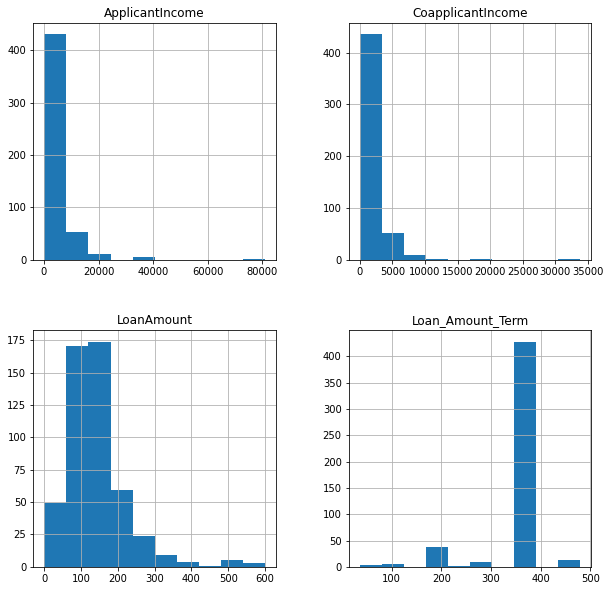

In [ ]:
#Creating histograms
loan_df[num_cols].hist(figsize=(10,10))
plt.show()

In [ ]:
#@title Univeriate Analysis of Categorical Columns
for i in cat_cols:
    print(loan_df[i].value_counts(normalize=True))
    print('*'*40)

Male      0.823647
Female    0.176353
Name: Gender, dtype: float64
****************************************
Yes    0.649299
No     0.350701
Name: Married, dtype: float64
****************************************
Graduate        0.791583
Not Graduate    0.208417
Name: Education, dtype: float64
****************************************
No     0.861723
Yes    0.138277
Name: Self_Employed, dtype: float64
****************************************
1.0    0.851703
0.0    0.148297
Name: Credit_History, dtype: float64
****************************************
Semiurban    0.390782
Urban        0.318637
Rural        0.290581
Name: Property_Area, dtype: float64
****************************************
1    0.683367
0    0.316633
Name: Loan_Status, dtype: float64
****************************************
0     0.569138
2     0.176353
1     0.168337
3+    0.086172
Name: Dependents, dtype: float64
****************************************


**Observations**


*   **Among the past customers of the bank, 82% are male and 18% female.**
*   A similar trend can be observed in the education column where 79% had graduated vs 21% had not.
*  **The majority of loan requestors are married with 65% over 35%.**
*  **Self-employment status is low at almost 14% vs 86% employed. The lack of credit history has a similar percentage (15% vs 85%)**
*   There seems to be a healthy distribution between semiurban(39%), urban (32%) and rural(29%) areas.




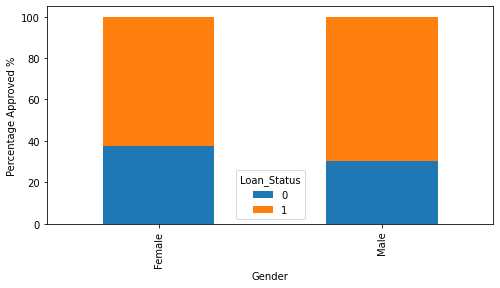

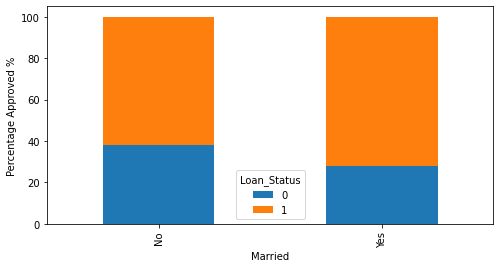

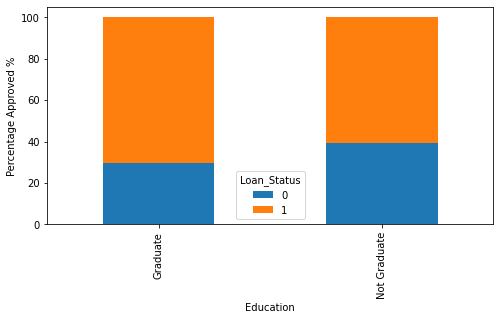

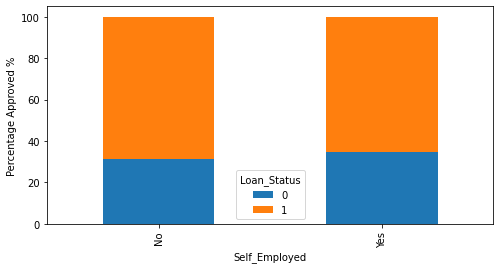

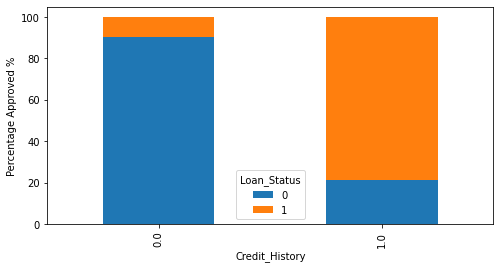

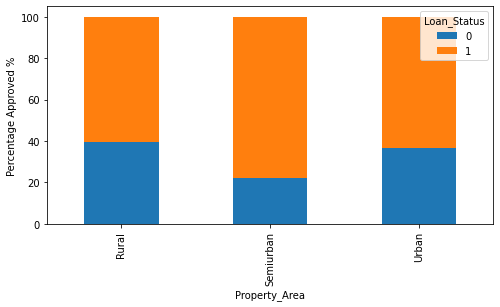

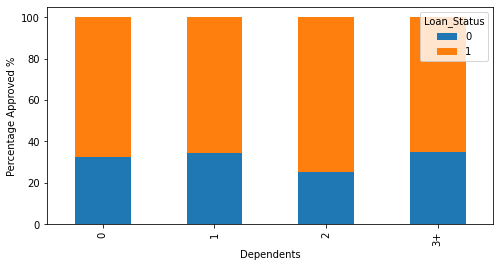

In [ ]:
#@title Bivariate and Multivariate Analysis
for i in cat_cols:
    if i!='Loan_Status':
        (pd.crosstab(loan_df[i],loan_df['Loan_Status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Approved %')

**Categorical Variable Observations:**
- **80% of people with a credit history are approved compared with only 10% on people with no credit history.**
- Clients in semiurban areas have higher chances (80%) to be approved for credits when compared to the other two categories (Rural 60% and Urban 65%)

Other not-so-dramatic observations: 
- Male applicants have higher chances to obtain a loan than their counterparts. Similarly, Married applicants have higher chances to obtain a loan versus their counterparts. **(On both columns the difference is about 10%)**
- People with a graduate degree are 10% more likely to be approved when compared to people that do not have a graduate degree.

In [ ]:
#@title Relationship between Loan_Status and numerical variables
loan_df.groupby(['Loan_Status'])[num_cols].mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Loan_Status,,,,
0,5703.620253,1728.113924,143.670886,341.620253
1,5165.853372,1492.342874,137.164223,342.193548


**Quantitative Data Observations:**

- The **mean income of rejected loan applicants is higher** (5703.6) than approved customers (5165.85). The **same can be observed in the coaplicant income column** (1723.11 in rejected coaplicants and 14952.34 in approved coapplicants).
- The **loan amount mean on rejected candidates is higher** (143.6) than the approved candidates (137.1).
- Lastly, we can also observe that the **loan term is higher in approved candidates** (342.19) when compared to their rejected counterpart (341.6)

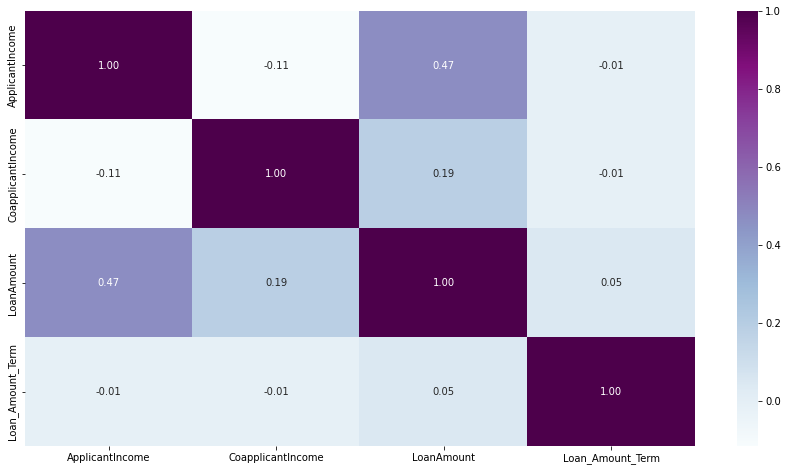

In [ ]:
#@title Relationship between different numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(loan_df[num_cols].corr(),annot=True, fmt='0.2f', cmap='BuPu')

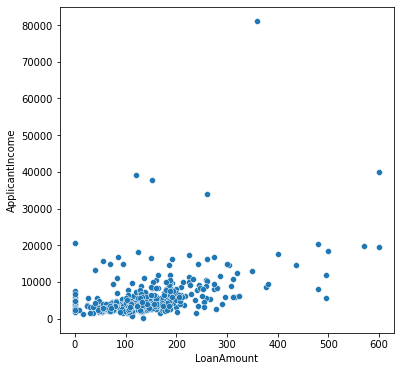

In [ ]:
#@title Scatter Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'LoanAmount', y = 'ApplicantIncome', data = loan_df)
plt.show()

**Correlation Analysis Observations**

- There is a positive .47 correlation between the loan amount and the applicant's income. The highest correlation of the lot.
- The second highest positive correlation is similar to the aforementioned. Coaplicant's income and the loan amount have a score of 0.19

**Scatterplot Observations**
- Variables appear correlated
- Consider removing either LoanAmount or ApplicantIncome

### **Data Preparation**

**Getting Dummy variables for categorical variables**

In [ ]:
#creating list og dummy columns
to_get_dummies_for = ['Gender', 'Education', 'Property_Area','Dependents']

#creating dummy variables
loan_df = pd.get_dummies(data = loan_df, columns= to_get_dummies_for, drop_first= True)

#mapping married, self_employed, loan_status
dict_Married = {'Yes': 1, 'No':0}
dict_Self_Employed = {'Yes': 1, 'No': 0}


loan_df['Married'] = loan_df.Married.map(dict_Married)
loan_df['Self_Employed'] = loan_df.Self_Employed.map(dict_Self_Employed)

In [ ]:
#@title Split the independent(X) and dependent(Y) Variables
#Separating target variable and other variables
Y= loan_df.Loan_Status
X= loan_df.drop(['Loan_Status'],axis=1)

In [ ]:
#@title Splitting the data into 70% train and 30% test set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [ ]:
#@title Creating Metric Function
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

Use Metric Function

In [ ]:
#@title Building a Decision Tree Model
#instantiate the decision tree classifier with the correct weights
#building decision tree
dt = DecisionTreeClassifier(class_weight={0:0.32,1:0.68}, random_state=1)

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.32, 1: 0.68}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       238

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



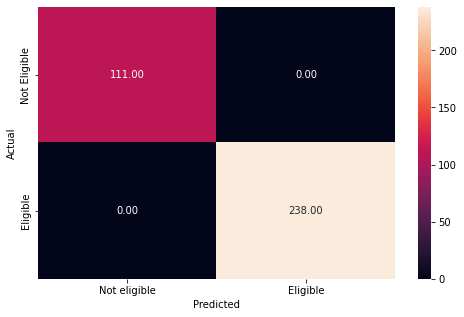

In [ ]:
#Checking performance on the training data
y_train_pred_dt=dt.predict(x_train)
metrics_score(y_train,y_train_pred_dt)

**Observations**
- The model has 100% accuracy but might not perform as well on the testing data set. Due to having 100% accuracy, the error/misclassification rate on the training set is 0%.
- The Decision Tree is giving a **100% result on the training dataset**. Besides the accuracy, precision, and recall are also optimal at 100%. This means that the performance on the training set is very strong, as it predicts perfectly who is eligible and who is not. 

              precision    recall  f1-score   support

           0       0.51      0.57      0.54        47
           1       0.79      0.75      0.77       103

    accuracy                           0.69       150
   macro avg       0.65      0.66      0.66       150
weighted avg       0.70      0.69      0.70       150



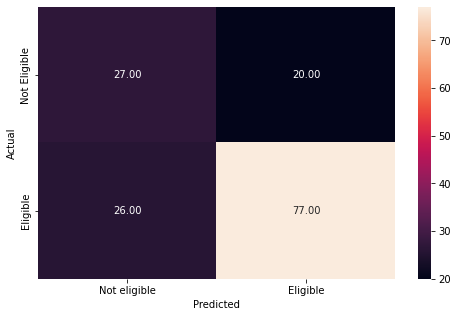

In [ ]:
#Checking performance on the test dataset
y_test_pred_dt=dt.predict(x_test)
metrics_score(y_test,y_test_pred_dt)

**Observations:**

- Accuracy on the test set is 0.69 or 69% (104/150).The error rate on the test set is thus 0.31 or 31%.
- The Decision Tree works well on the training data but **not so well on the test data** as the recall is 0.75 as compared to 1 for training dataset. i.e. The Decision Tree is over fitting on the data.
- Precision of the model is at 0.75 or 75% determining that the model is quite reliable. It suggests, however, that there is still a **25% chance** that the model will create a false negative, or that an eligible individual will be denied a loan.


**Plotting the feature importance

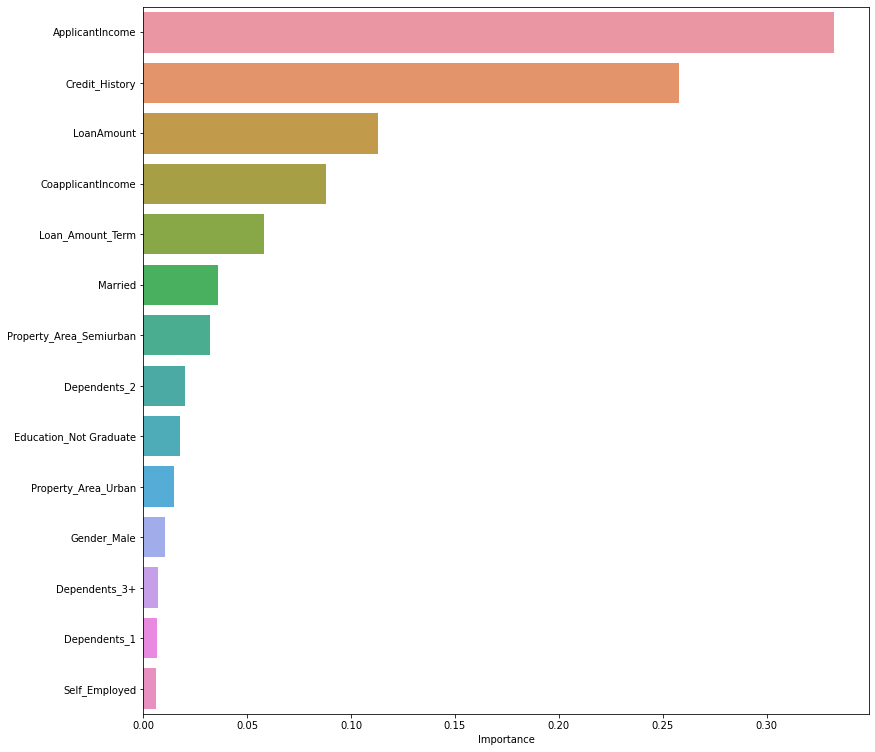

In [ ]:
#plotting the importance plot
importances = dt.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**
- According to the Decision Tree, **ApplicantIncome is the most important feature, followed by Credit_History, LoanAmount, and CoapplicantIncome** 
- This might signify that the income of an applicant is the main indicator as to whether they are eligible for a loan or not.

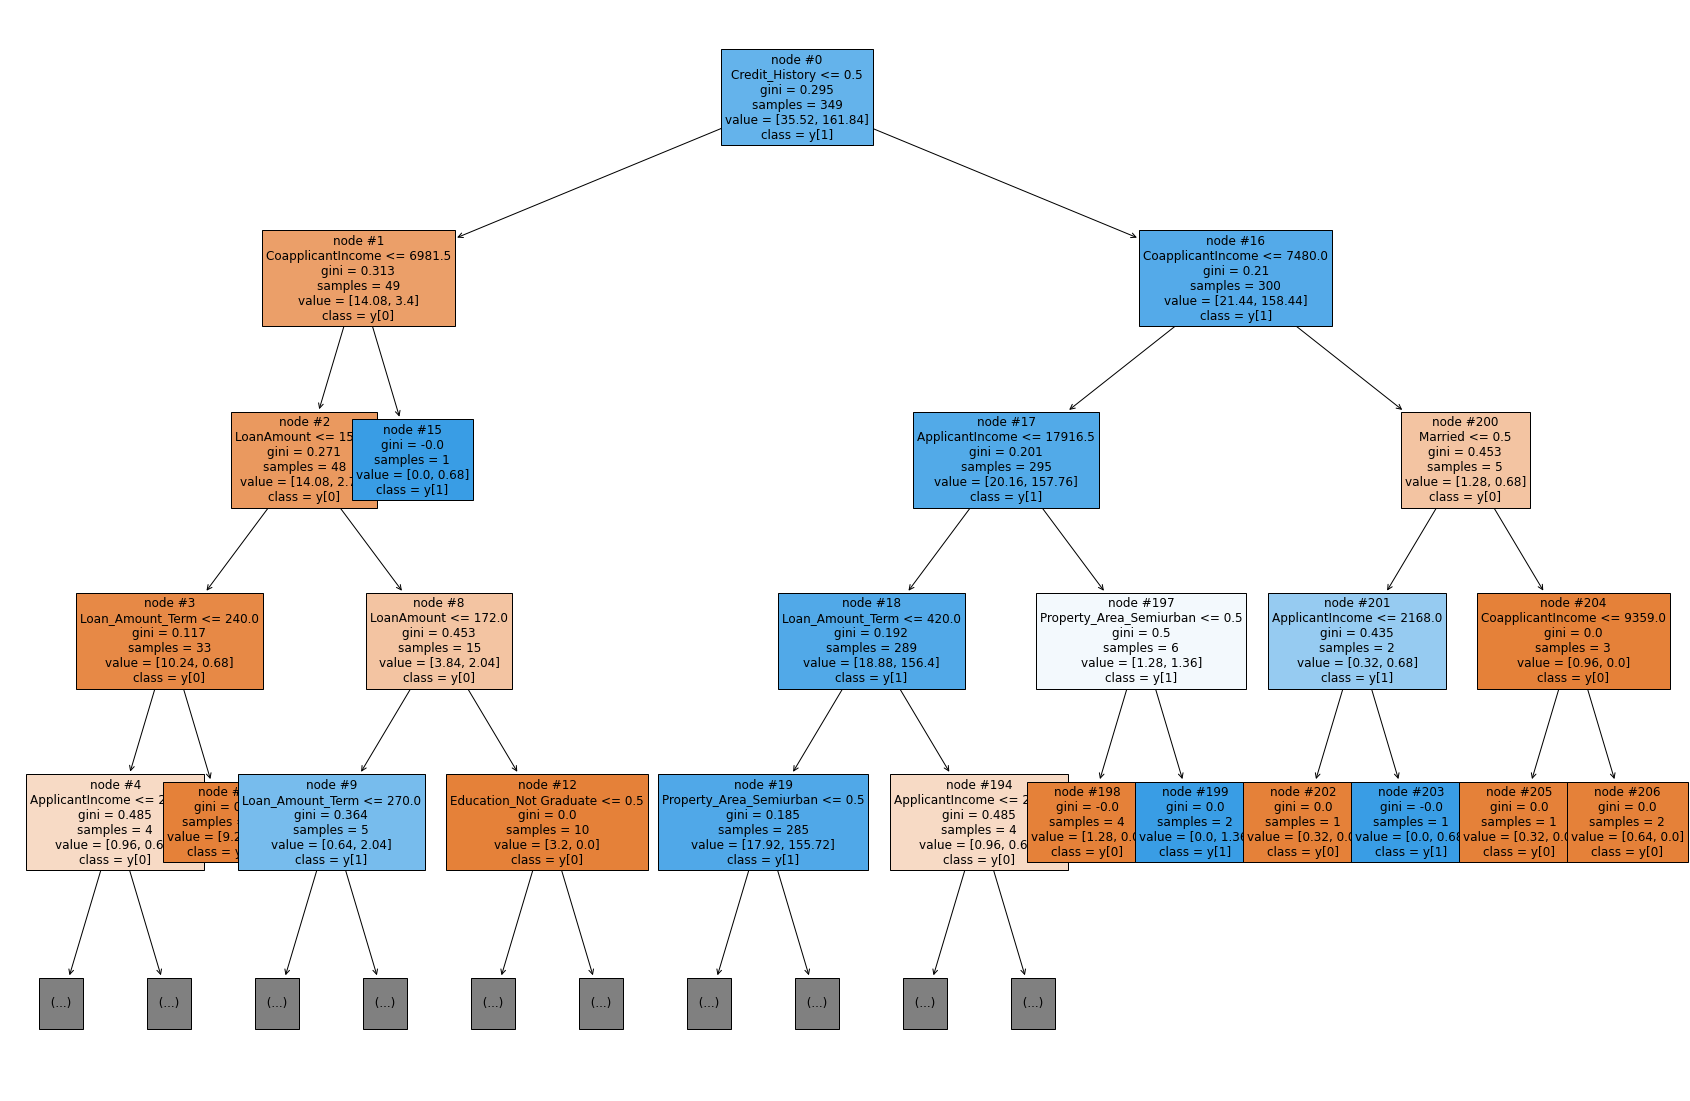

In [ ]:
features = list(X.columns)

plt.figure(figsize=(30,20))

tree.plot_tree(dt,max_depth=4,feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

In [ ]:
#@title Building the Random Forest Classifier
#Fitting the decision tree classifier on the training data rf_estimator
rf_estimator = RandomForestClassifier(class_weight={0:0.32,1:0.68}, random_state=1)

rf_estimator.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.32, 1: 0.68}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       238

    accuracy                           1.00       349
   macro avg       1.00      1.00      1.00       349
weighted avg       1.00      1.00      1.00       349



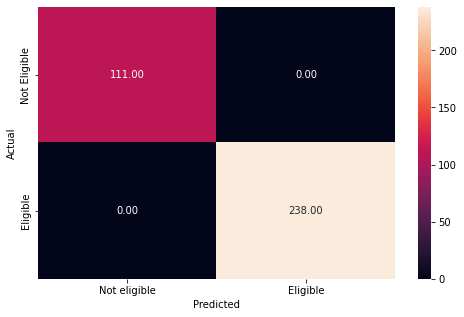

In [ ]:
#Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(x_train)
metrics_score(y_train, y_pred_train_rf)

**Observations:**


- The model has 100% accuracy but might not perform as well on the testing data set. Due to having 100% accuracy, the error/misclassification rate on the training set is 0%.
- There is a **100% fit** on the training data using the random forest classifier.



              precision    recall  f1-score   support

           0       0.72      0.55      0.63        47
           1       0.82      0.90      0.86       103

    accuracy                           0.79       150
   macro avg       0.77      0.73      0.74       150
weighted avg       0.79      0.79      0.78       150



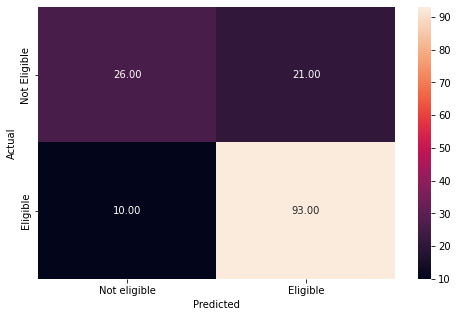

In [ ]:
#Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(x_test)
metrics_score(y_test, y_pred_test_rf)

**Observations:**
- Accuracy on the test set is 0.79 or 79% (119/150).The error rate on the test set is thus 0.21 or 21%. Hence, it is more accurate than the decision tree test data (which had an accuracy score of 0.69).
- The recall for the random tree classifier is **.90** for the test data, which is better than .75 recall in the decision tree test data
- The precision of the test data through the random tree classifier is also higher than the decision tree model, **.82** vs .79, implying that our model is more reliable now. 
- Specifically, now only 18% (instead of 21%) would be false negatives, or that eligible applicants could be denied loans.
- Using this model would allow the bank to provide more loans to eligible applicants and reduce likelihood of giving out loans to ineligible applicants. In other words, the bank stands to gain more money by correctly approving loans. 



**Feature Importance of the Random Forest**

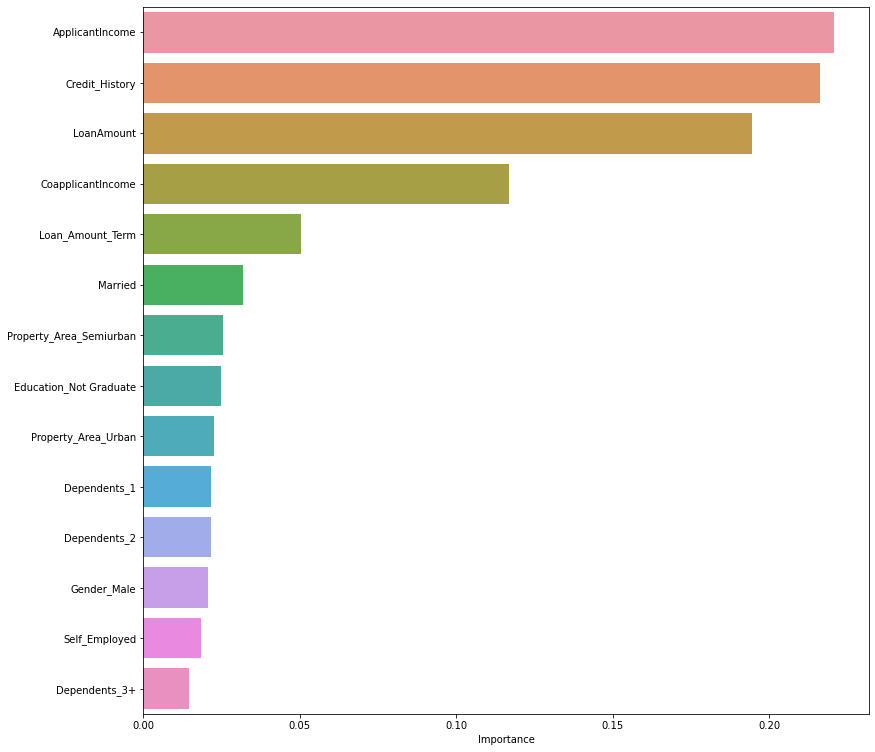

In [ ]:
importances = rf_estimator.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

**Observations**
- **ApplicantIncome, Credit_History, and LoanAmount** are still the top three features in terms of importance, like in the decision tree model. However, there is less contrast between the three features in the random forest model. 
- CoapplicantIncome carries a comparatively higher importance in the random forest than in the decision tree. 




### **Tuning the Random Forest (Train Data)**

In [ ]:
# # Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(class_weight={0:0.32,1:0.68}, random_state=1)

# # Grid of parameters to choose from
# ## add from article
params_rf = {  
         "n_estimators": [100,250,500],
        "min_samples_leaf": np.arange(1, 4,1),
         "max_features": [0.7,0.9,'auto'],
}


# # Type of scoring used to compare parameter combinations - precision score for class 1
scorer = metrics.make_scorer(precision_score, pos_label=1)

# # Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, params_rf, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# # Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

In [ ]:
rf_estimator_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.32, 1: 0.68}, max_features=0.7,
                       min_samples_leaf=2, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.99      0.76      0.86       111
           1       0.90      1.00      0.94       238

    accuracy                           0.92       349
   macro avg       0.94      0.88      0.90       349
weighted avg       0.93      0.92      0.92       349



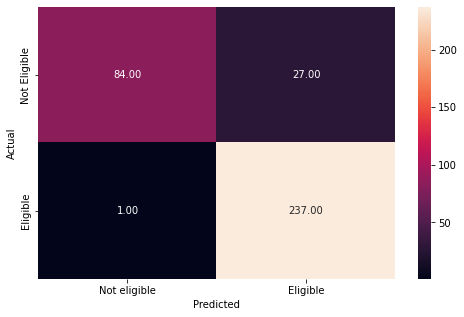

In [ ]:
#Checking performance on the training data
y_pred_train_rf_tuned = rf_estimator_tuned.predict(x_train)
metrics_score(y_train, y_pred_train_rf_tuned)

**Observations**


*   Using cross-validation to tune the hyperparameters has maximized recall from 0.9 in the un-tuned model to **1.0 in the tuned model**
*   Precision remains unchanged
*   f1-score has improved from 0.86 to **0.9**



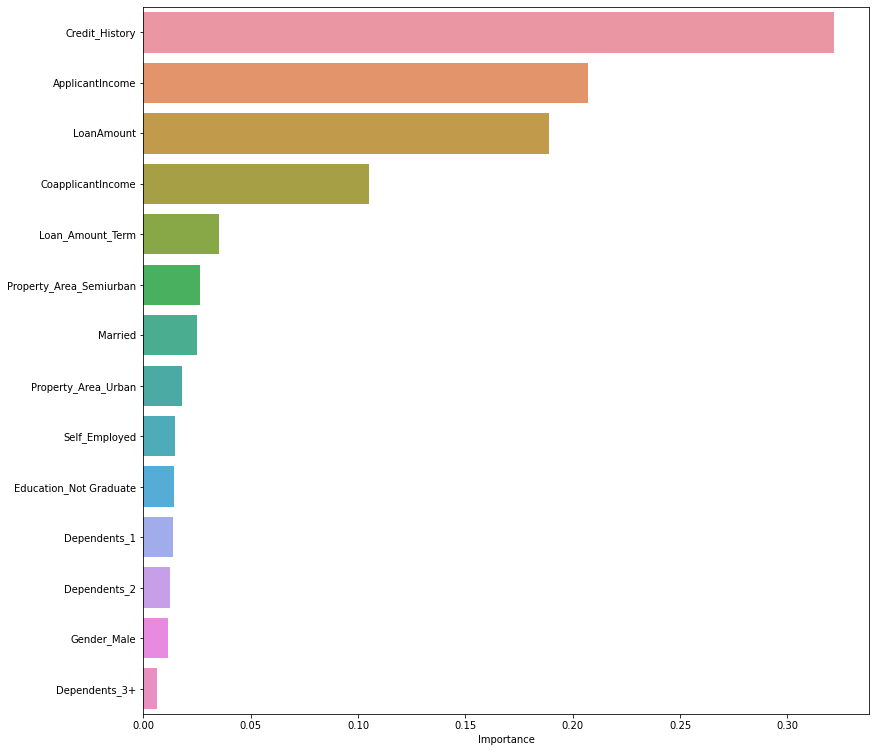

In [ ]:
#plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

**Observations:**

*   The tuned model seems to suggest that **Credit_History**, ApplicantIncome, LoanAmount, CoapplicantIncome are the most important features

In [ ]:
rf_estimator_tuned.fit(x_test, y_test)

RandomForestClassifier(class_weight={0: 0.32, 1: 0.68}, max_features=0.7,
                       min_samples_leaf=2, n_estimators=500, random_state=1)

              precision    recall  f1-score   support

           0       0.94      0.66      0.78        47
           1       0.86      0.98      0.92       103

    accuracy                           0.88       150
   macro avg       0.90      0.82      0.85       150
weighted avg       0.89      0.88      0.87       150



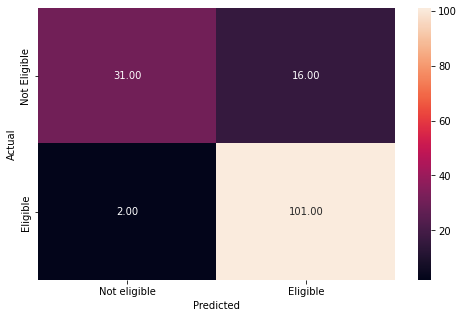

In [ ]:
#Checking performance on the testing data
y_pred_test_rf_tuned = rf_estimator_tuned.predict(x_test)
metrics_score(y_test, y_pred_test_rf_tuned)

***Observations***
- Compared to the tuned train set, the tuned test data no longer seems to be overfitting, as the recall is now **98%** as compared to **100%**
- Compared to the test set prior to tuning, precision is similar, recall is higher, and the f1-score is higher (**89%** compared to **86%**)
- On all evaluation metrics, the Random Forest Classifier performs better on the test data than the Decision Tree Classifier does

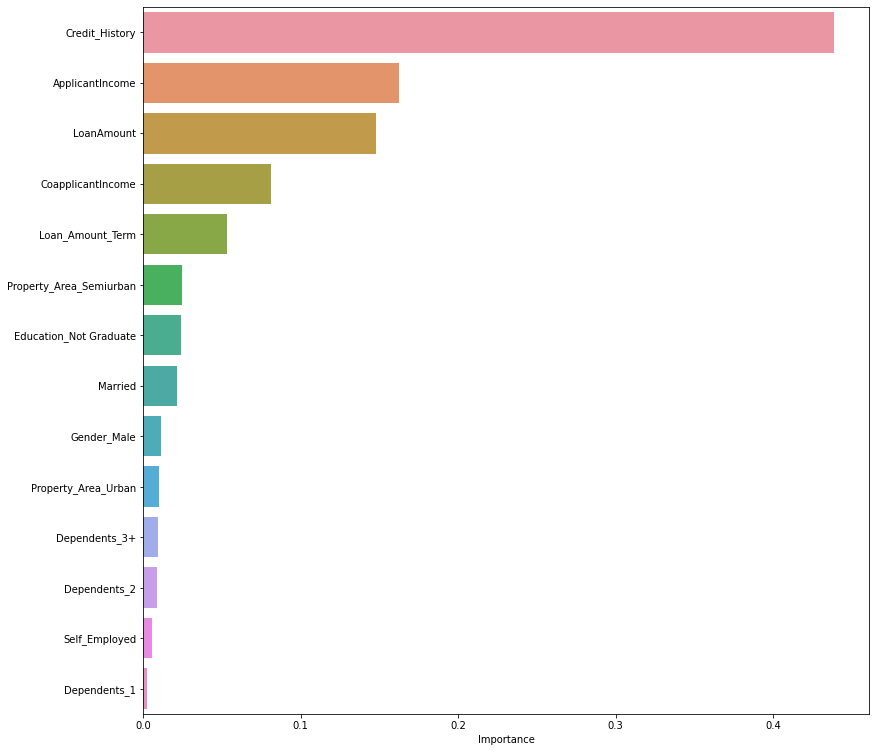

In [ ]:
#plotting feature importance
importances = rf_estimator_tuned.feature_importances_
columns=X.columns
importance_df=pd.DataFrame(importances,index=columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(13,13))
sns.barplot(importance_df.Importance,importance_df.index)

***Observations***
- **Credit_History**, ApplicantIncome, LoanAmount, and CoapplicantIncome have the most importance, with **Credit_History** showing significantly more importance among the 4 features

# **Recommendations**
- Bank should employ programs to educate and encourage customers to build their credit history early on in order to create a foundation for future loan status
- More defined criteria for applicants